In [58]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
from ipywidgets import interact

In [3]:
def tolerance_plot(f_p, f_s, gpass, gstop, w, mag):
    max_freq = max(f_p, f_s)
    if max_freq >= 1e9:
        scale = 1e9
        unit = 'GHz'
    elif max_freq >= 1e6:
        scale = 1e6
        unit = 'MHz'
    elif max_freq >= 1e3:
        scale = 1e3
        unit = 'kHz'
    else:
        scale = 1
        unit = 'Hz'
    
    # Normalize the frequencies for plotting
    f_p_norm = f_p / scale
    f_s_norm = f_s / scale
    w_norm = w / scale

    plt.semilogx(w_norm/(2*np.pi), mag, linewidth=3)
    # Add shaded regions for passband, transition band, and stopband
    plt.fill_betweenx([0, -gpass], 1e-1 * f_p_norm, f_p_norm, color='lightgreen', alpha=0.5, label='Passband')
    plt.fill_betweenx([-gpass, -gstop], f_p_norm, f_s_norm, color='lightgrey', alpha=0.5, label='Transition Band')
    plt.fill_betweenx([-gstop, -40], f_s_norm, 1e1 * f_s_norm, color='lightcoral', alpha=0.5, label='Stopband')

    # Add limited length horizontal and vertical lines for gpass and gstop
    plt.plot([1e-1 * f_p_norm, f_p_norm], [-gpass, -gpass], 'g--', label=f'-{gpass} dB', linewidth=2)
    plt.plot([f_s_norm, 1e1 * f_s_norm], [-gstop, -gstop], 'r--', label=f'-{gstop} dB', linewidth=2)
    plt.plot([f_p_norm, f_p_norm], [-gpass, -gstop], 'k--', label=f'Passband edge: {f_p_norm/1e3} kHz', linewidth=2)
    plt.plot([f_s_norm, f_s_norm], [-gpass, -gstop], 'k--', label=f'Stopband edge: {f_s_norm/1e3} kHz', linewidth=2)

    # Set custom x and y ticks
    min_order = np.floor(np.log10(1e-1 * f_p_norm))
    max_order = np.ceil(np.log10(1e1 * f_s_norm))
    xticks = np.logspace(min_order, max_order, num=int(max_order - min_order + 1))
    xticks = np.unique(np.append(xticks, [f_p_norm, f_s_norm]))
    xtick_labels = [f'{int(tick)}' for tick in xticks]
    plt.xticks(xticks, xtick_labels)
    plt.yticks([-40, -gstop, -20, -10, -gpass, 0], ['-40', str(-gstop), '-20', '-10', str(-gpass), '0'])

    ax = plt.gca()
    xticks = ax.get_xticklabels()
    yticks = ax.get_yticklabels()

    for label in xticks:
        if label.get_text() == str(int(f_p_norm)):
            label.set_color('green')
            label.set_fontweight('bold')
        if label.get_text() == str(int(f_s_norm)):
            label.set_color('red')
            label.set_fontweight('bold')

    for label in yticks:
        if label.get_text() == str(-gpass):
            label.set_color('green')
            label.set_fontweight('bold')
        if label.get_text() == str(-gstop):
            label.set_color('red')
            label.set_fontweight('bold')
    
    plt.ylim(-40, 3)
    plt.xlim(1e-1*f_p_norm, 1e1*f_s_norm)
    plt.xlabel(f'Frequency [{unit}]')
    plt.ylabel('Gain [dB]')

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

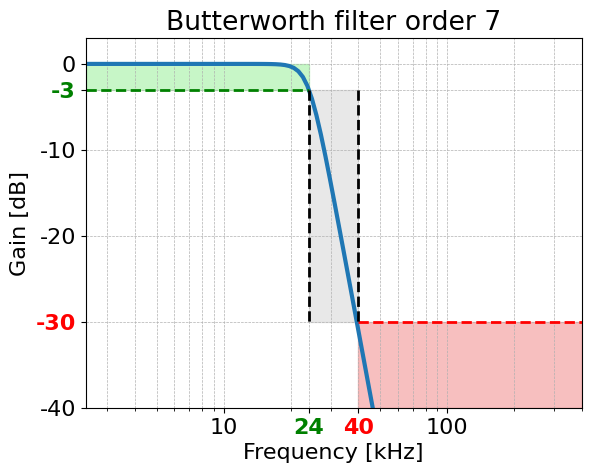

In [4]:
f_p, f_s = 24e3, 40e3
w_p, w_s = 2*np.pi*f_p, 2*np.pi*f_s
gpass, gstop = 3, 30

n, w_p = signal.buttord(w_p, 2*np.pi*f_s, gpass, gstop, analog=True)
b,a = signal.butter(n, w_p, analog=True)
w, mag, phase = signal.bode(signal.TransferFunction(b, a))

tolerance_plot(f_p, f_s, gpass, gstop, w, mag)
plt.title(f'Butterworth filter order {n}');

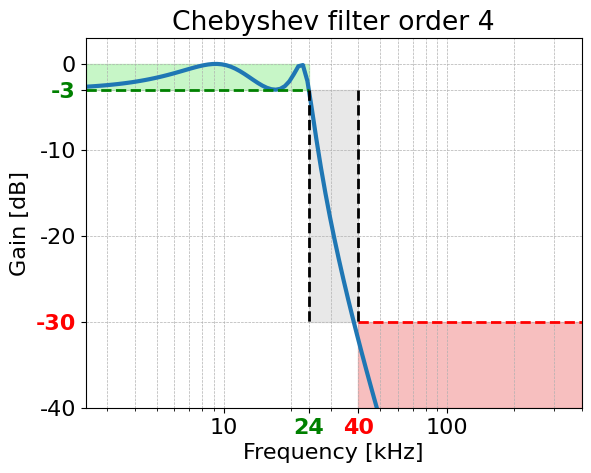

In [5]:
f_p, f_s = 24e3, 40e3
w_p, w_s = 2*np.pi*f_p, 2*np.pi*f_s
gpass, gstop = 3, 30

n, w_p = signal.cheb1ord(w_p, 2*np.pi*f_s, gpass, gstop, analog=True)
b,a = signal.cheby1(n, gpass, w_p, analog=True)
w, mag, phase = signal.bode(signal.TransferFunction(b, a))

tolerance_plot(f_p, f_s, gpass, gstop, w, mag)
plt.title(f'Chebyshev filter order {n}');

In [83]:

# Define the function H(s, a)
def H_flat(w, a):
    return 1 / np.sqrt((1-w**2)**2 + (a*w)**2)

# Create a range of s values
w = np.linspace(0, 4, 100)

# Define a function to plot H(s, a) for a range of s values
def plot_func(a):
    fig = plt.figure()
    plt.plot(w, H_flat(w, a), linewidth=2)
    plt.ylim(0, 1.2)
    plt.xlabel(r'$\omega$')
    plt.ylabel(r'$|H(j\omega)|$')
    plt.grid(True)
    fig.tight_layout()
    plt.show()

# Create an interactive widget for a
interact(plot_func, a=(1, 2, 0.01))

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=1.0, step=0.01), Output()), _dom_clâ€¦

<function __main__.plot_func(a)>

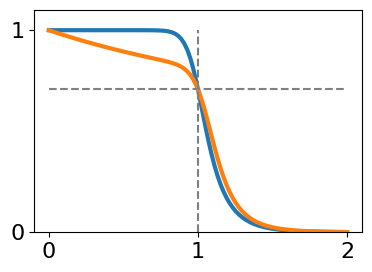

In [38]:
n = 10

# Define the function H(s, a)
def H1(w):
    return 1 / np.sqrt(1 + w**(2*n))
def H2(w):
    return 1 / np.sqrt(1 + 1/2*w + 1/2*w**(2*n))

# Create a range of s values
w = np.linspace(0, 2, 100)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
# Define a function to plot H(s, a) for a range of s values
for H in [H1, H2]:
    plt.plot(w, H(w), linewidth=3)
plt.ylim(0, 1.1)
plt.hlines(1/np.sqrt(2), 0, 2, linestyles='--', color='gray', label=r'$1/\sqrt{2}$')
plt.vlines(1, 0, 1, linestyles='--', color='gray', label=r'$\omega_c$')
ax.set_xticks([0, 1, 2])  # Set x ticks at 0, 1, 2
ax.set_yticks([0, 1])  # Set y ticks at 0, 1
fig.tight_layout()
plt.show()

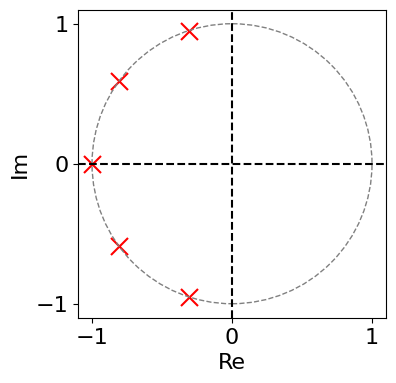

In [81]:
n = 5
k = np.arange(0, n)
#pole_angles = np.pi/2+np.pi/2*((2*k + 1)/n)
pole_angles = np.pi/2 + np.pi*(2*k + 1)/(2*n)
pole_angles = np.pi/(2*n)*(2*k + 1 + n)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.scatter(np.cos(pole_angles), np.sin(pole_angles), s=150, marker='x', color='red', label='Poles')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
ax.set_aspect('equal')
ax.vlines(0, -1.1, 1.1, linestyles='--', color='k')
ax.hlines(0, -1.1, 1.1, linestyles='--', color='k')
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
plt.xlabel('Re')
plt.ylabel('Im')

# Add a unit circle
circle = patches.Circle((0, 0), 1, fill=False, linestyle='--', color='gray')
ax.add_patch(circle)